In [60]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
import scikitplot as skplt

## Importação do Dataset

In [2]:
heart_df = pd.read_csv('HeartAttack/heart.csv')

In [3]:
heart_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Separação em Dados de Treino e Dados de Teste

In [4]:
heart_df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

In [5]:
X = heart_df.drop(columns=['output'])
y = heart_df['output']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

## Criando Pipelines

In [7]:
def best_estimator(cls, params, cv=10):
    pipe = Pipeline(steps=[('scale', StandardScaler()), ('cls', cls)])
    gs = GridSearchCV(estimator=pipe, 
                  param_grid=params,
                  cv=cv,
                  n_jobs=-1)
    
    gs.fit(X_train, y_train)
    return gs

## Aplicação de Modelos de ML

In [36]:
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
lr_param = {
            'cls__fit_intercept' : [True, False],
            'cls__solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'cls__C' : param_range
}

sgd_param = {
            'cls__loss' : ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
            'cls__penalty' : ['l2', 'l1', 'elasticnet'],
            'cls__fit_intercept' : [True, False],
            'cls__shuffle' : [True, False],
            'cls__eta0' : [0.1, 0.2, 0.3, 0.4, 0.5],
            'cls__learning_rate' : ['constant', 'invscaling', 'adaptive']
}

gnb_param = {
            'cls__var_smoothing' : [10**-9]
}

knn_param = {
            'cls__n_neighbors' : [_ for _ in range(2,16)],
            'cls__weights' : ['uniform', 'distance'],
            'cls__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
}

rf_param = {
            'cls__n_estimators' : [_ for _ in range(5, 20, 5)],
            'cls__criterion' : ['gini', 'entropy'],
            'cls__max_depth' : [_ for _ in range(2, 16, 2)],
            'cls__min_samples_split' : [_ for _ in range(2,6)],
            'cls__min_samples_leaf' : [_ for _ in range(1, 5)],
            'cls__max_features' : ['auto', 'sqrt', 'log2']
}



In [37]:
models = [(LogisticRegression(), lr_param), (SGDClassifier(), sgd_param), (GaussianNB(), gnb_param), (KNeighborsClassifier(), knn_param), (RandomForestClassifier(), rf_param)]

In [38]:
models_gs = []

for model in models:
    print(model[0])
    pipe = model[0]
    params = model[1]
    models_gs.append(best_estimator(pipe, params))

LogisticRegression()
SGDClassifier()
GaussianNB()
KNeighborsClassifier()
RandomForestClassifier()


### Regressão Logística

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

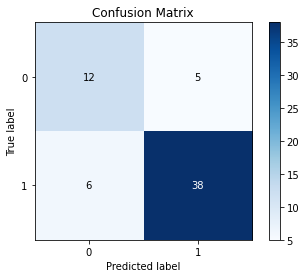

In [40]:
lr = models_gs[0]
lr.best_estimator_.fit(X_train, y_train)
y_pred = lr.best_estimator_.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, y_pred)

### SGD Classifier

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

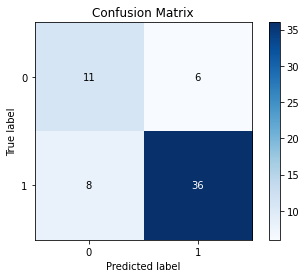

In [42]:
sgd = models_gs[1]
sgd.best_estimator_.fit(X_train, y_train)
y_pred = sgd.best_estimator_.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, y_pred)

### GaussianNB

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

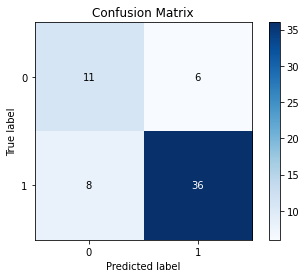

In [43]:
gnb = models_gs[2]
gnb.best_estimator_.fit(X_train, y_train)
y_pred = gnb.best_estimator_.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, y_pred)

### KNN

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

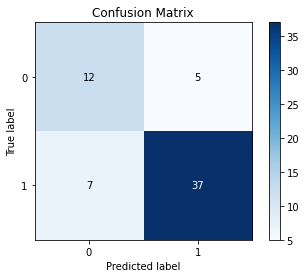

In [50]:
knn = models_gs[3]
knn.best_estimator_.fit(X_train, y_train)
y_pred = knn.best_estimator_.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, y_pred)

In [61]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.63      0.71      0.67        17
           1       0.88      0.84      0.86        44

    accuracy                           0.80        61
   macro avg       0.76      0.77      0.76        61
weighted avg       0.81      0.80      0.81        61



### Random Forest

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

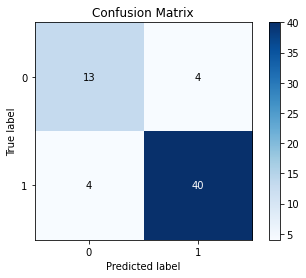

In [45]:
rf = models_gs[4]
rf.best_estimator_.fit(X_train, y_train)
y_pred = rf.best_estimator_.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, y_pred)